# Detailed date manipulations with Python

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read in the data.
df = pd.read_csv('lightning_strikes_2016.csv', on_bad_lines='skip')
df2 = pd.read_csv('lightning_strikes_2018.csv', on_bad_lines='skip')

C:\Users\Zahad.Ali\AppData\Local\Temp\ipykernel_12824\2290736238.py:2: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('lightning_strikes_2016.csv', on_bad_lines='skip')


In [3]:
arr = ['225.5)', '20)', '2016INT(-82.1 22.3)',
       '2016-07-146-07-14', '2012)', '2016-0.3 50.2)', '2016-07-15 18.5)',
       '20T(-75.5 41.9)', '203.5)', '2016-07-49.5)', '2016', '2014',
       '2016--07-14', '2016-08 45.2)', '2016-07-1T(-87.3 31.9)',
       '2016-07-1416-07-14', '2016-07-141', '2016-09 22.9)',
       '2016-07-0 50.7)', '2034.6)', '2016-0.9)', '2016-07-5',
       '2016-07-7-15', '2016-07-1NT(-92.9 33.4)', '2015',
       '2016-07-16-07-15', '2016-07-15 19.6)', '2016-',
       '2016-07NT(-79 35.7)', '2016-07-T(-84.8 19.9)', '2016-07- 25.2)',
       '2016--98.8 40.4)', '215', '2016016-07-15', '2016(-81.1 21.8)',
       '20-07-15', '216-07-15', '2016-07-016-07-15']

In [4]:
df = df[~df['date'].isin(arr)]
df = df[df['number_of_strikes'].apply(lambda x: isinstance(x, int))]

In [5]:
df = pd.concat([df,df2])

In [6]:
df.head(10)

,date,number_of_strikes,center_point_geom
0,2016-01-04,55,POINT(-83.2 21.1)
1,2016-01-04,33,POINT(-83.1 21.1)
2,2016-01-05,46,POINT(-77.5 22.1)
3,2016-01-05,28,POINT(-76.8 22.3)
4,2016-01-05,28,POINT(-77 22.1)
5,2016-01-05,30,POINT(-76.7 22.3)
6,2016-01-05,34,POINT(-76.8 22.4)
7,2016-01-06,31,POINT(-74.2 25.9)
8,2016-01-06,24,POINT(-76 22.9)
9,2016-01-06,25,POINT(-75.3 22.7)


In [7]:
# Convert the `date` column to datetime.
df['date'] = pd.to_datetime(df['date'])

In [8]:
# Create four new columns.
df['week'] = df['date'].dt.strftime('%Y-W%V')
df['month'] = df['date'].dt.strftime('%Y-%m')
df['quarter'] = df['date'].dt.to_period('Q').dt.strftime('%Y-Q%q')
df['year'] = df['date'].dt.strftime('%Y')

In [9]:
df.head(10)

,date,number_of_strikes,center_point_geom,week,month,quarter,year
0,2016-01-04,55,POINT(-83.2 21.1),2016-W01,2016-01,2016-Q1,2016
1,2016-01-04,33,POINT(-83.1 21.1),2016-W01,2016-01,2016-Q1,2016
2,2016-01-05,46,POINT(-77.5 22.1),2016-W01,2016-01,2016-Q1,2016
3,2016-01-05,28,POINT(-76.8 22.3),2016-W01,2016-01,2016-Q1,2016
4,2016-01-05,28,POINT(-77 22.1),2016-W01,2016-01,2016-Q1,2016
5,2016-01-05,30,POINT(-76.7 22.3),2016-W01,2016-01,2016-Q1,2016
6,2016-01-05,34,POINT(-76.8 22.4),2016-W01,2016-01,2016-Q1,2016
7,2016-01-06,31,POINT(-74.2 25.9),2016-W01,2016-01,2016-Q1,2016
8,2016-01-06,24,POINT(-76 22.9),2016-W01,2016-01,2016-Q1,2016
9,2016-01-06,25,POINT(-75.3 22.7),2016-W01,2016-01,2016-Q1,2016


In [10]:
# Create a new dataframe view of just 2018 data, summed by week.
df_by_week_2018 = df[df['year'] == '2018'][['week','number_of_strikes']].groupby('week').sum().reset_index()
df_by_week_2018.head()

,week,number_of_strikes
0,2018-W01,34843
1,2018-W02,353425
2,2018-W03,37132
3,2018-W04,412772
4,2018-W05,34972


Text(0.5, 1.0, 'Number of lightning strikes per week')

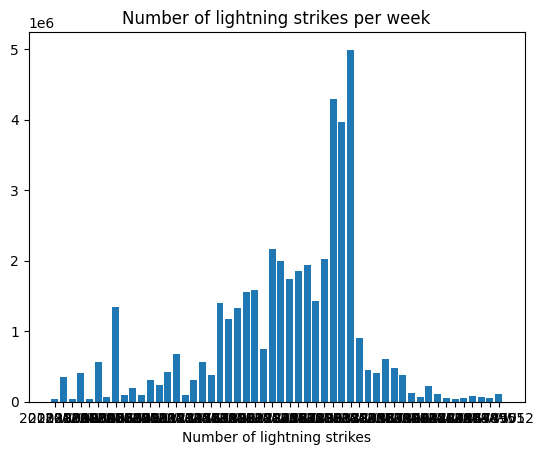

In [11]:
# Plot a bar graph of weekly strike totals in 2018.
plt.bar(x = df_by_week_2018['week'], height = df_by_week_2018['number_of_strikes'])
plt.plot()
plt.xlabel('Week Number')
plt.xlabel('Number of lightning strikes')
plt.title('Number of lightning strikes per week')

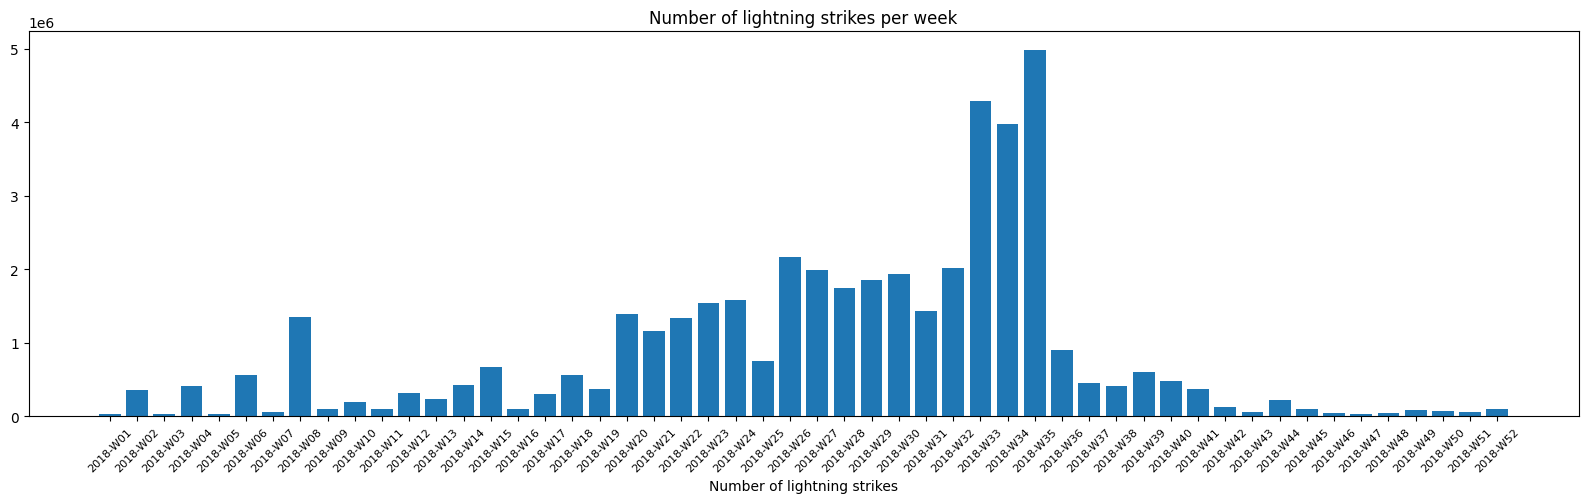

In [12]:
# Adhusting x-labels
plt.figure(figsize=(20,5))
plt.bar(x = df_by_week_2018['week'], height = df_by_week_2018['number_of_strikes'])
plt.plot()
plt.xlabel('Week Number')
plt.xlabel('Number of lightning strikes')
plt.title('Number of lightning strikes per week')
plt.xticks(rotation = 45, fontsize = 8)
plt.show()

Next, plot lightning strikes by quarter for the full date range of available data. For a visualization, it will be easiest to work with numbers in millions, such as 25.2 million. As an example, the following code will divide the `number_of_strikes` column by one million.

In [13]:
# Convert in Millions
df_by_quarter = df['number_of_strikes'].div(1000000)
df_by_quarter.head()

0    0.000055
1    0.000033
2    0.000046
3    0.000028
4    0.000028
Name: number_of_strikes, dtype: object

In [14]:
# Group 2016-2018 data by quarter and sum
df_by_quarter = df[['quarter','number_of_strikes']].groupby('quarter').sum().reset_index()

# Format as text, in millions
df_by_quarter['number_of_strikes_formatted'] = df_by_quarter['number_of_strikes'].div(1000000).astype(float).round(1).astype(str) + 'M'
df_by_quarter.head()

,quarter,number_of_strikes,number_of_strikes_formatted
0,2016-Q1,2683798,2.7M
1,2016-Q2,15078446,15.1M
2,2016-Q3,21738874,21.7M
3,2016-Q4,1969754,2.0M
4,2017-Q1,2444279,2.4M


In [15]:
# data label function
def addlabels (x, y, labels):
    '''
    Iterates over data and plots text labels above each bar of bar graph.
    '''
    for i in range(len(x)):
        plt.text(i, y[i], labels[i], ha = 'center', va = 'bottom')

Now we'll plot the bar graph. 

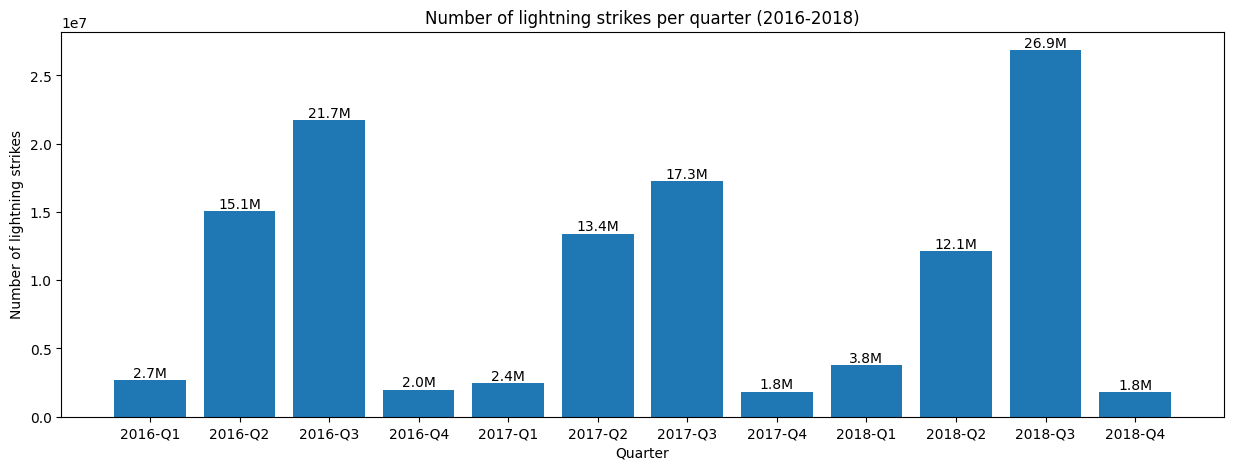

In [16]:
#plot the bar graph
plt.figure(figsize=(15,5))
plt.bar(x = df_by_quarter['quarter'], height= df_by_quarter['number_of_strikes'])
addlabels(df_by_quarter['quarter'], df_by_quarter['number_of_strikes'], df_by_quarter['number_of_strikes_formatted'])
plt.plot()
plt.xlabel('Quarter')
plt.ylabel('Number of lightning strikes')
plt.title('Number of lightning strikes per quarter (2016-2018)')
plt.show()

We can create a grouped bar chart to better compare year-over-year changes each quarter. We'll do this by creating two new columns that break out the quarter and year from the `quarter` column. To do this, we use the `quarter` column and take the last two characters to get `quarter_number`, and take the first four characters to get `year`.

In [17]:
# Create two new columns for quarter number and year
df_by_quarter['quarter_number'] = df_by_quarter['quarter'].str[-2:]
df_by_quarter['year'] = df_by_quarter['quarter'].str[:4]
df_by_quarter.head()

,quarter,number_of_strikes,number_of_strikes_formatted,quarter_number,year
0,2016-Q1,2683798,2.7M,Q1,2016
1,2016-Q2,15078446,15.1M,Q2,2016
2,2016-Q3,21738874,21.7M,Q3,2016
3,2016-Q4,1969754,2.0M,Q4,2016
4,2017-Q1,2444279,2.4M,Q1,2017


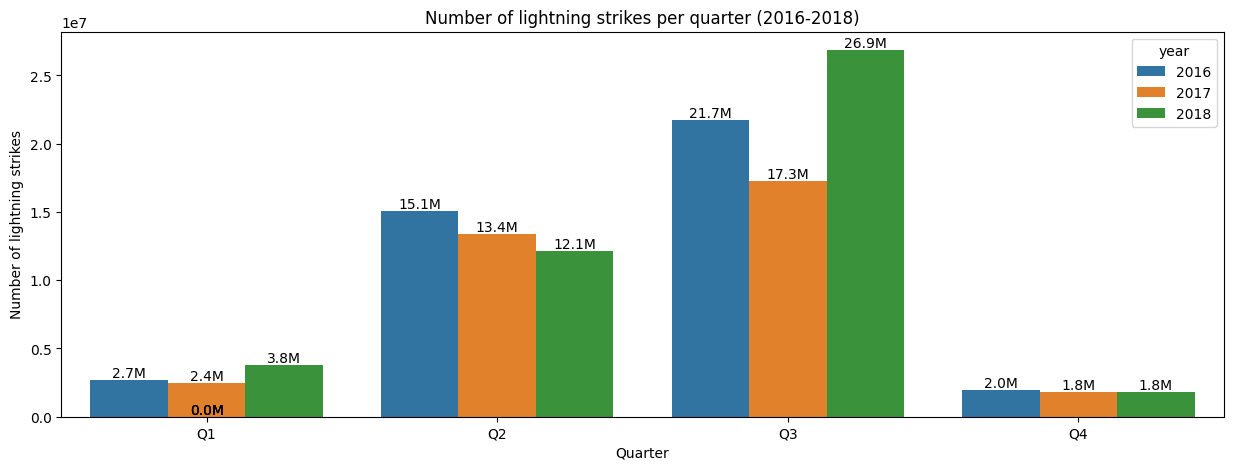

In [18]:
# plot advanced bar chart
plt.figure(figsize = (15, 5))
p = sns.barplot(
    data = df_by_quarter,
    x = 'quarter_number',
    y = 'number_of_strikes',
    hue = 'year')
for b in p.patches:
    p.annotate(str(round(b.get_height()/1000000, 1))+'M', 
                   (b.get_x() + b.get_width() / 2., b.get_height() + 1.2e6), 
                   ha = 'center', va = 'bottom', 
                   xytext = (0, -12), 
                   textcoords = 'offset points')
plt.xlabel("Quarter")
plt.ylabel("Number of lightning strikes")
plt.title("Number of lightning strikes per quarter (2016-2018)")
plt.show()